# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [59]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)
# y=y/(y.max())
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



## Visualize Dataset
This is the same code from Assignment 1

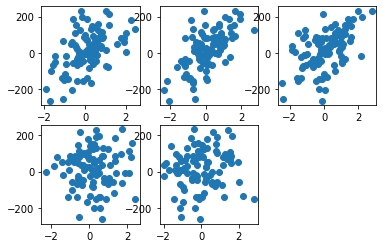

In [60]:
import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.scatter(X[:,i],y)
plt.show()

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [92]:
import tensorflow as tf
from tensorflow import keras
# from keras import metrics
# from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Passing a list of layers to the constructor
model = Sequential([
    Dense(5, activation='relu', input_shape=(5,),name="layer1"),
    Dense(5,activation='relu', name="layer2"),
    Dense(1, name="layer3"),
])
model.summary()
epochs = 100

model.compile(
         optimizer= tf.keras.optimizers.SGD(learning_rate=0.001),
               loss='mean_squared_error'
          
              )
result = model.fit(X_train, y_train,batch_size=32, epochs=epochs,validation_data=(X_test, y_test),shuffle=True)
model.evaluate(X_test, y_test)

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 30        
                                                                 
 layer2 (Dense)              (None, 5)                 30        
                                                                 
 layer3 (Dense)              (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 111ms/step - loss: 11516.9189 - val_loss: 11503.2100
Epoch 2/100
3/3 [==============================] - 0s 26ms/step - loss: 11440.6377 - val_loss: 11318.1406
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 11240.9502 - val_loss: 10619.1611
Ep

130.77047729492188

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

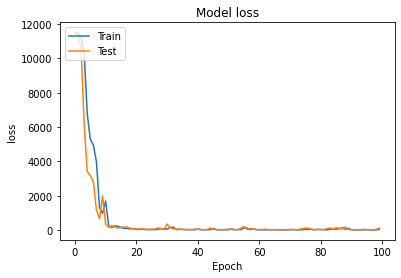

In [94]:

plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [95]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
accu = r2_score(y_test,y_pred)
print("Accuracy:", accu)

Accuracy: 0.9871431868609025


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [98]:
#CUSTOM MODEL
my_model = Sequential([
    Dense(5, activation='relu', input_shape=(5,),name="layer1"),
    Dense(5,activation='relu', name="layer2"),
    Dense(3,activation='relu', name="layer3"),
    Dense(1, name="layer4")
])
my_model.summary()

def custom_loss_function(y_true, y_pred):
   squared_difference = tf.square(y_true - y_pred)
   return tf.reduce_mean(squared_difference, axis=-1)
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=custom_loss_function)
my_result = my_model.fit(X_train, y_train,validation_data=(X_test, y_test),batch_size= 32,epochs=100)
my_model.evaluate(X_test, y_test)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5)                 30        
                                                                 
 layer2 (Dense)              (None, 5)                 30        
                                                                 
 layer3 (Dense)              (None, 3)                 18        
                                                                 
 layer4 (Dense)              (None, 1)                 4         
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 139ms/step - loss: 11509.8047 - val_loss: 11586.3730
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 11504.2480

370.1602478027344

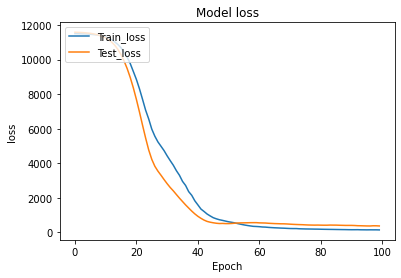

In [99]:
plt.plot(my_result.history['loss'])
plt.plot(my_result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss', 'Test_loss'], loc='upper left')
plt.show()

In [100]:
from sklearn.metrics import r2_score
y_pred = my_model.predict(X_test)
accuracy = r2_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.96360738599422
